###*60009220131 Sayantan Mukherjee D2-2*

In [ ]:
import kagglehub
iarunava_cell_images_for_detecting_malaria_path = kagglehub.dataset_download('iarunava/cell-images-for-detecting-malaria')

print('Data source import complete.')


100%|██████████| 675M/675M [00:30<00:00, 23.0MB/s]

Extracting files...


Data source import complete.


### 1. Importng Necesary Libraries

In [ ]:
# Basic Libraries for Data Manipulations
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt

# Machine Learning Libraries.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

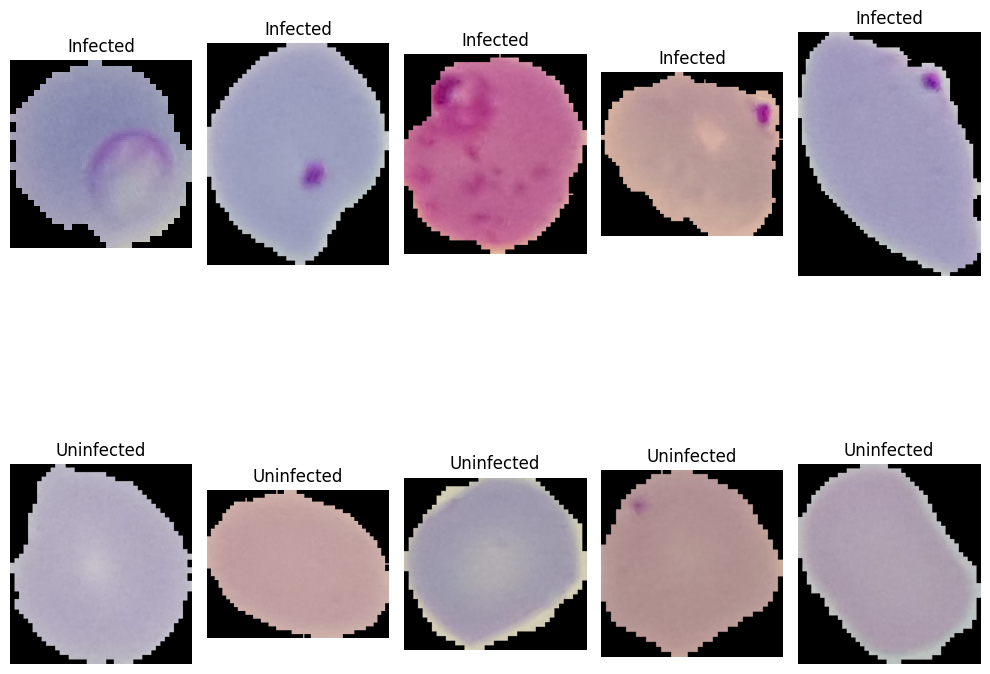

In [ ]:
import matplotlib.pyplot as plt
import os

image_dir = iarunava_cell_images_for_detecting_malaria_path + '/cell_images'

infected_dir = os.path.join(image_dir, 'Parasitized')
uninfected_dir = os.path.join(image_dir, 'Uninfected')

infected_images = os.listdir(infected_dir)[:5]
uninfected_images = os.listdir(uninfected_dir)[:5]

plt.figure(figsize=(10, 10))

for i, img_name in enumerate(infected_images):
    img_path = os.path.join(infected_dir, img_name)
    img = plt.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title("Infected")
    plt.axis('off')

for i, img_name in enumerate(uninfected_images):
    img_path = os.path.join(uninfected_dir, img_name)
    img = plt.imread(img_path)
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.title("Uninfected")
    plt.axis('off')

plt.tight_layout()
plt.show()


###*Train Test Split*


In [ ]:
IMAGE_DIR = os.path.join(iarunava_cell_images_for_detecting_malaria_path, 'cell_images', 'cell_images')
IMG_SIZE = (128, 128)
BATCH_SIZE = 64

In [ ]:


datagen = ImageDataGenerator(rescale=1/255.0,
                             validation_split=0.2,
                             rotation_range=5.0,
                             width_shift_range=5.0,
                             height_shift_range=5.0,
                             horizontal_flip=True,
                             vertical_flip=True)

train_datagen = datagen.flow_from_directory(directory=IMAGE_DIR,
                                            target_size= IMG_SIZE,
                                            class_mode = 'binary',
                                            batch_size = 16,
                                            subset='training')

valid_datagen = datagen.flow_from_directory(directory = IMAGE_DIR,
                                           target_size = IMG_SIZE,
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


###*Cell Visualization*

Train Input  batch Shape:  (16, 128, 128, 3)
Train Output batch Shape:  (16,)


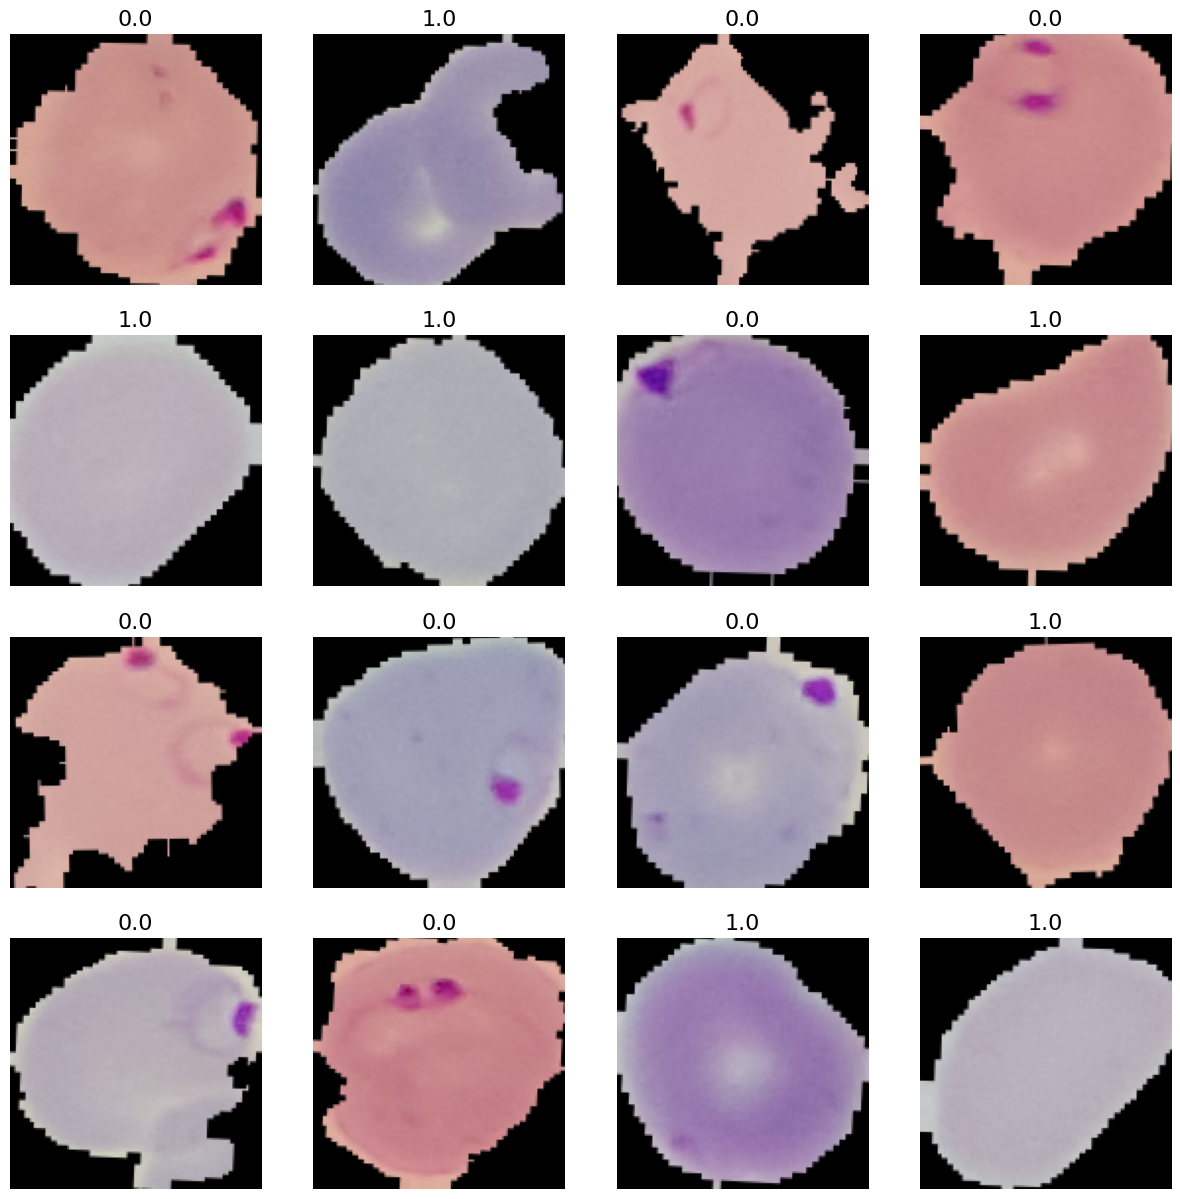

In [ ]:
X, Y = next(train_datagen)
print('Train Input  batch Shape: ', X.shape)
print('Train Output batch Shape: ', Y.shape)

rows = int(np.sqrt(X.shape[0]))
cols = int(np.sqrt(X.shape[0]))


fig = plt.figure(figsize=(15,15))
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(np.squeeze(X[i-1]))
    plt.title(str(Y[i-1]), fontsize=16)
    plt.axis(False)
    fig.add_subplot

# 4. Model Cration and training
## 4.1 Model From Scratch:
With the following model in the markdown box, I was able to achieve upto 95% accuracy on validation set. Feel free to play with this by converting this cell into a code cell.

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_datagen,
                             steps_per_epoch = len(train_datagen),
                              epochs =10,
                              validation_data = valid_datagen,
                              validation_steps=len(valid_datagen))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 826,529 (3.15 MB)

 Trainable params: 826,529 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 146s 101ms/step - accuracy: 0.5908 - loss: 0.6531 - val_accuracy: 0.9428 - val_loss: 0.2114
Epoch 2/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 151s 109ms/step - accuracy: 0.9442 - loss: 0.1889 - val_accuracy: 0.9416 - val_loss: 0.1863
Epoch 3/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 133s 97ms/step - accuracy: 0.9542 - loss: 0.1597 - val_accuracy: 0.9446 - val_loss: 0.1773
Epoch 4/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 132s 96ms/step - accuracy: 0.9546 - loss: 0.1563 - val_accuracy: 0.9497 - val_loss: 0.1593
Epoch 5/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 149s 108ms/step - accuracy: 0.9561 - loss: 0.1550 - val_accuracy: 0.9485 - val_loss: 0.1590
Epoch 6/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 188s 98ms/step - accuracy: 0.9571 - loss: 0.1457 - val_accuracy: 0.9450 - val_loss: 0.1791
Epoch 7/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 149s 108ms/step - accuracy: 0.9586 - loss: 0.1356 - val_accuracy: 0.9149 - val_loss: 0.2838
Epoch 8/10
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 131s 95ms/step - accura

## 4.2 EfficentNet-B0 Model:

### 4.2.1 Installation and Setup

In [ ]:
!pip install -q efficientnet
!pip install -q pyyaml h5py

import efficientnet.tfkeras as efn
import tensorflow.keras.layers as Layers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


### 4.2.2 Creating Model, Compiling

In [ ]:
with strategy.scope():
    model_efn_b0 = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(*IMG_SIZE, 3),
            weights='imagenet',
            include_top=False
        ),
        Layers.GlobalAveragePooling2D(),
        Layers.Dense(1, activation='sigmoid')
    ])

    model_efn_b0.compile(
        optimizer='adam',
        loss = 'binary_crossentropy',
        metrics=['accuracy']
    )
    model_efn_b0.summary()

16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)         │ (None, 4, 4, 1280)          │       4,049,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,050,845 (15.45 MB)

 Trainable params: 4,008,829 (15.29 MB)

 Non-trainable params: 42,016 (164.12 KB)

### 4.2.3 Learning Rate Scheduler

In [ ]:
def build_lrfn(lr_start=1e-5, lr_max=1e-4,
               lr_min=0, lr_rampup_epochs=8,
               lr_sustain_epochs=1, lr_exp_decay=.8):

    def lrfn(epoch):
        if epoch < lr_rampup_epochs:
            lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
        elif epoch < lr_rampup_epochs + lr_sustain_epochs:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) *\
                 lr_exp_decay**(epoch - lr_rampup_epochs\
                                - lr_sustain_epochs) + lr_min
        return lr
    return lrfn

lrfn = build_lrfn()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

### 4.2.4 Model Checkpoints Callback

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model_efnB0_best_val_acc.weights.h5',
                                                      save_weights_only=True,
                                                      monitor='val_accuracy',
                                                      mode='max',
                                                      save_best_only=True)

### 4.2.5 Training
Now let us train the model.

In [ ]:
history = model_efn_b0.fit(train_datagen,
                           epochs=10,
                           steps_per_epoch=len(train_datagen),
                           validation_data = valid_datagen,
                           validation_steps=len(valid_datagen),
                           callbacks=[lr_schedule, model_checkpoint],
                           verbose = 0)



Epoch 1: LearningRateScheduler setting learning rate to 1e-05.

Epoch 2: LearningRateScheduler setting learning rate to 2.125e-05.

Epoch 3: LearningRateScheduler setting learning rate to 3.2500000000000004e-05.

Epoch 4: LearningRateScheduler setting learning rate to 4.375e-05.

Epoch 5: LearningRateScheduler setting learning rate to 5.5e-05.

Epoch 6: LearningRateScheduler setting learning rate to 6.625000000000001e-05.

Epoch 7: LearningRateScheduler setting learning rate to 7.75e-05.

Epoch 8: LearningRateScheduler setting learning rate to 8.875e-05.

Epoch 9: LearningRateScheduler setting learning rate to 0.0001.

Epoch 10: LearningRateScheduler setting learning rate to 0.0001.


### 4.2.6 Training Summary Visualization

In [ ]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(fontsize = 'x-large')


    plt.subplot(2,1,2)
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10,5))
    plt.plot(history.history['lr'], label = 'lr', marker = '*',linewidth = lw)
    plt.title('Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.show()

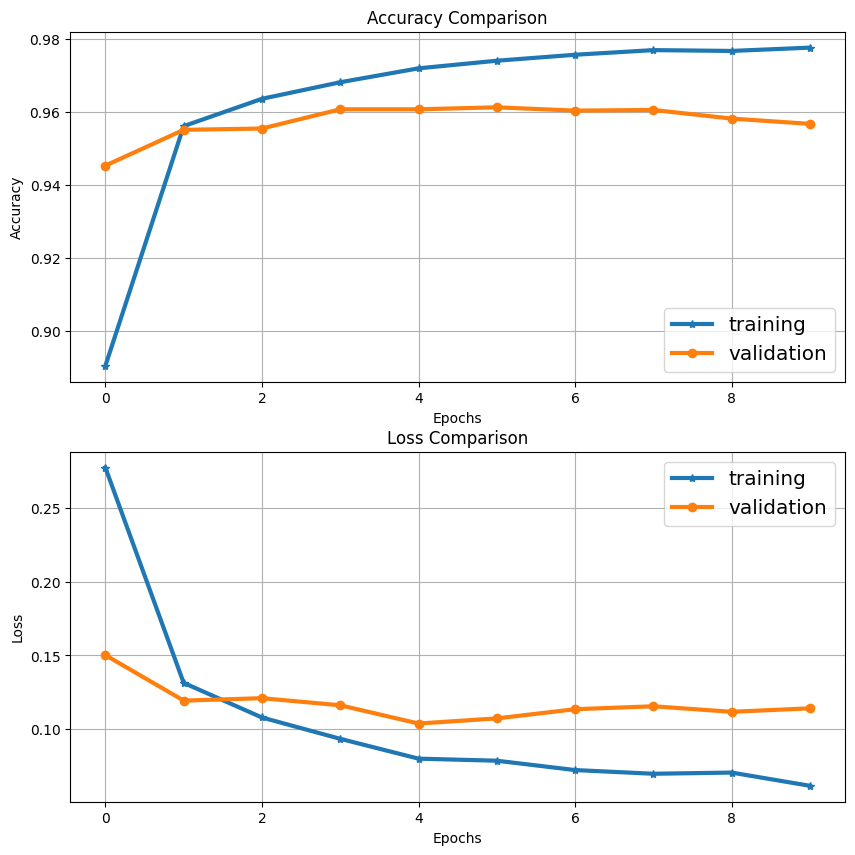

KeyError: 'lr'

<Figure size 1000x500 with 0 Axes>

In [ ]:
visualize_training(history)

### 4.2.7 Inference
Now let's find out the prediction of the model on the vaidation dataset. We are also making an array of the labels of the validation set from the DataGenerator for our further evaluation of model.

In [ ]:
labels_test = []
for i in range(0, len(valid_datagen)):
    labels_test.extend(np.array(valid_datagen[i][1]))

labels_test = np.array(labels_test, dtype = 'int64')


labels_predict = model_efn_b0.predict(valid_datagen)



345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step


### 4.2.8 Result Analysis
#### Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

labels_predict =  ((labels_predict > 0.5)*1).squeeze()

print(classification_report(labels_test, labels_predict,
                            labels = [1,0],
                            target_names = ['Parasitized', 'Uninfected']) )

              precision    recall  f1-score   support

 Parasitized       0.94      0.98      0.96      2755
  Uninfected       0.98      0.94      0.96      2755

    accuracy                           0.96      5510
   macro avg       0.96      0.96      0.96      5510
weighted avg       0.96      0.96      0.96      5510



#### Confusion matrix

[[2576  179]
 [  47 2708]]


<Axes: >

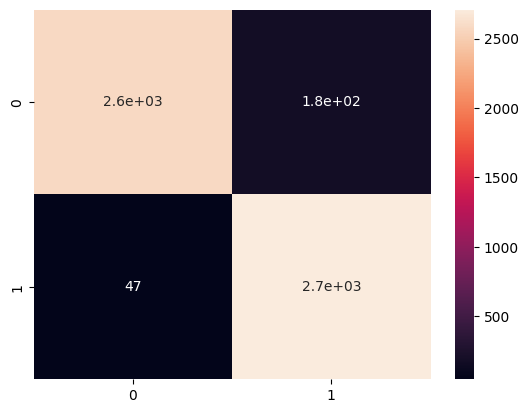

In [ ]:
import seaborn as sns
print(confusion_matrix(labels_test, labels_predict))
sns.heatmap(confusion_matrix(labels_test, labels_predict), annot=True)

#### Area Under ROC Curve

Area Under ROC-Curve:  0.9589836660617059


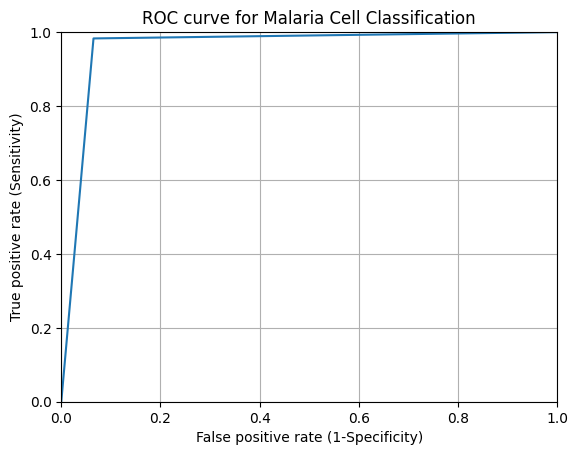

In [ ]:
print('Area Under ROC-Curve: ', roc_auc_score(labels_test, labels_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(labels_test, labels_predict , drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Malaria Cell Classification')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)